In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

src = "drive/MyDrive/"
x = np.load(src+"Fold-5/data-train-x-5.npy")

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, add, Flatten, Dense, DepthwiseConv2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

def PEPXModel(input_tensor, filters, name):
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'FP')(input_tensor)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Expansion')(x)
    x = DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same', name=name + 'DWConv3_3')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'SP')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Extension')(x)
    return x


def keras_model_build(input_size=(240,240, 3)):
    # input
    input = Input(shape=input_size, name='input')
    x = Conv2D(input_shape=input_size, filters=48, kernel_size=(7, 7), activation='relu', padding='same',
               strides=(1, 1))(input)
    x = MaxPool2D(pool_size=(2, 2))(x)
    # _Conv1x1
    x =Conv2D(filters=160, kernel_size=(1,1), activation= 'relu' ,name = "conv1x1160") (x) 
    # pepx1 
    pepx_11 = PEPXModel(x, 160, "pepx1.1")
    pexp_12 = PEPXModel(add([x,pepx_11]),160, "pepx1.2")
    pexp_13 = PEPXModel(add([x,pepx_11,pexp_12]),160, "pepx1.3")
    #conv1x1
    x = Conv2D(328,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x1328") (add([x,pepx_11,pexp_12,pexp_13]))
    #pepx2
    pepx_21 = PEPXModel(x, 328, "pepx21")
    pepx_22 = PEPXModel(add([x,pepx_21]), 328, "pepx22")
    pepx_23 = PEPXModel(add([x,pepx_21,pepx_22]), 328, "pepx23")
    pepx_24 = PEPXModel(add([x,pepx_21,pepx_22,pepx_23]), 328, "pepx24")
    #conv1x1 
    x = Conv2D(640,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x140") (add([x,pepx_21,pepx_22,pepx_23,pepx_24]))
    #pepx3
    pepx_31 = PEPXModel(x,640,'pepx31')
    pepx_32 = PEPXModel(add([x,pepx_31]),640,'pepx32')
    pepx_33 = PEPXModel(add([x,pepx_31,pepx_32]),640,'pepx33')
    pepx_34 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33]),640,'pepx34')
    pepx_35 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34]),640,'pepx35')
    pepx_36 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34,pepx_35]),640,'pepx36')
    #conv1x1 
    x = Conv2D(2048,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x12048") (add([x,pepx_31,pepx_32,pepx_33,pepx_34, pepx_35,pepx_36]))
    #pepx4
    pepx_41 = PEPXModel(x,2048,'pepx41')
    pepx_42 = PEPXModel(add([x,pepx_41]),2048,'pepx42')
    pepx_43 = PEPXModel(add([x,pepx_41,pepx_42]),2048,'pepx43')
    # FC
    fla = Flatten()(add([x,pepx_41,pepx_42,pepx_43]))
    d1 = Dense(256, activation='relu')(fla)
    d1 = Dense(128, activation='relu')(d1)
    output = Dense(3, activation='softmax')(d1)
    return keras.models.Model(input, output)

model = keras_model_build()
# model.summary()


In [ ]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 input (None, 240, 240, 3)
1 conv2d (None, 240, 240, 48)
2 max_pooling2d (None, 120, 120, 48)
3 conv1x1160 (None, 120, 120, 160)
4 pepx1.1FP (None, 120, 120, 160)
5 pepx1.1Expansion (None, 120, 120, 160)
6 pepx1.1DWConv3_3 (None, 120, 120, 160)
7 pepx1.1SP (None, 120, 120, 160)
8 pepx1.1Extension (None, 120, 120, 160)
9 add (None, 120, 120, 160)
10 pepx1.2FP (None, 120, 120, 160)
11 pepx1.2Expansion (None, 120, 120, 160)
12 pepx1.2DWConv3_3 (None, 120, 120, 160)
13 pepx1.2SP (None, 120, 120, 160)
14 pepx1.2Extension (None, 120, 120, 160)
15 add_1 (None, 120, 120, 160)
16 pepx1.3FP (None, 120, 120, 160)
17 pepx1.3Expansion (None, 120, 120, 160)
18 pepx1.3DWConv3_3 (None, 120, 120, 160)
19 pepx1.3SP (None, 120, 120, 160)
20 pepx1.3Extension (None, 120, 120, 160)
21 add_2 (None, 120, 120, 160)
22 conv1x1328 (None, 60, 60, 328)
23 pepx21FP (None, 60, 60, 328)
24 pepx21Expansion (None, 60, 60, 328)
25 pepx21DWConv3_3 (None, 60, 60, 328)
26 pepx21SP (None, 60, 60, 328)
27 pepx21Extension (N

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[50].output)

In [ ]:
from keras.preprocessing.image import img_to_array

(240, 240, 3)


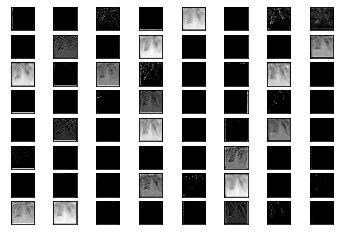

In [ ]:
img = x[1]
# convert the image to an array
img = img_to_array(img)
img \
print(img.shape) 
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()